Overfitting means the model performs well on the training data,but it doesnot generalize well.
The possible solutions can be :
>To simplify the model by selecting one with fewer parameters
>To gather more training data
>To reduce the noise in training data(e.g., fix data errors and remove outliers)

Constraining the model to make it simpler and resuce the risk of Overfitting is called Regularization
A good way to reduce overfitting is to regularize the model(i.e.to constrain it): the fewer degrees of freedom it has,the harder it will be for it overfit the data,which means by reducing the number of polynomial degrees.

For a linear model,regularization is typically achieved by constraining the weights of model such as Ridge Regression,Lasso Regression.
The amount of regularization to apply during learning can be controlled by a hyperparameter.A hyperparameter is a parameterof a learning algorithm(not of the model),must be set prior to training and remains constant during training.

# Ridge Regression (Tikhonov regularization)

It is regularized version of Linear Regression:a regularization term is added to the cost function.This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible.It should only be added to the cost function during training.Adds penalty equivalent to square of the magnitude of the coefficients.It is majorly used to prevent overfitting.

The hyperparameter alpha controls how much you want to regularize the model.If alpha =0 then RidgeRegression is just Linear Regression.If alpha is very large,then all weights end up very close to zero and result in a flat line.Thus its major advantage is coefficient shrinkage and reducing model complexity,It is L2 regularization.

In [81]:
import numpy as np

In [82]:
from sklearn.linear_model import Ridge

In [83]:
#Lets look the following example
m = 150
X = 6*np.random.rand(m,1)
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [84]:
X[1]

array([1.40358121])

In [85]:
y[1]

array([5.47926603])

In [86]:
ridge_reg = Ridge(alpha = 1,solver = 'cholesky')

alpha - Regularization strength.Tuning parameter which controls

normalize - Boolean,normalize the data or not

max_iter - maximum number of iterations.

solver;{‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’}

Solver to use in the computational routines:

‘auto’ chooses the solver automatically based on the type of data.

‘svd’ uses a Singular Value Decomposition of X to compute the Ridge coefficients. More stable for singular matrices than ‘cholesky’.

‘cholesky’ uses the standard scipy.linalg solve function to obtain a closed-form solution.

‘sparse_cg’ uses the conjugate gradient solver as found in scipy.sparse.linalg.cg. As an iterative algorithm, this solver is more appropriate than ‘cholesky’ for large-scale data (possibility to set tol and max_iter).

‘lsqr’ uses the dedicated regularized least-squares routine scipy.sparse.linalg.lsqr. It is the fastest and uses an iterative procedure.

‘sag’ uses a Stochastic Average Gradient descent, and ‘saga’ uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large.


In [87]:
ridge_reg.fit(X,y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [89]:
ridge_reg.predict([[1.4]])

array([[4.93246749]])

In [90]:
import pandas as pd

In [91]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [92]:
from sklearn.datasets import load_boston

In [93]:
boston = load_boston()

In [95]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [96]:
boston_df = pd.DataFrame(boston.data,columns = boston.feature_names)

In [97]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per `$10,000`
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- #MEDV - Median value of owner-occupied homes in $1000's

In [98]:
boston_df.sample()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
143,4.0974,0.0,19.58,0.0,0.871,5.468,100.0,1.4118,5.0,403.0,14.7,396.9,26.42


In [99]:
boston_df['LandPrice'] = boston.target

In [101]:
boston_df.sample()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,LandPrice
83,0.03551,25.0,4.86,0.0,0.426,6.167,46.7,5.4007,4.0,281.0,19.0,390.64,7.51,22.9


In [103]:
newX = boston_df.drop('LandPrice',axis = 1)
newX.sample()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
178,0.06642,0.0,4.05,0.0,0.51,6.86,74.4,2.9153,5.0,296.0,16.6,391.27,6.92


In [104]:
newY = boston_df['LandPrice']

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train,X_test,y_train,y_test = train_test_split(newX,newY,test_size = 0.3,random_state=1)

In [107]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [108]:
lr = LinearRegression()

In [109]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [110]:
rr = Ridge(alpha = 0.01,solver = 'cholesky')
## L2 norm term in ridge regression is weighted by the regularization parameter alpha

#So, if the alpha value is 0, it means that it is just an Ordinary Least Squares Regression model. 
#So, the larger is the alpha, the higher is the smoothness constraint.

#So, the smaller the value of alpha, the higher would be the magnitude of the coefficients

In [111]:
rr.fit(X_train,y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [112]:
train_score = lr.score(X_train,y_train)

In [113]:
test_score = lr.score(X_test,y_test)

In [114]:
ridge_train_score = rr.score(X_train,y_train)

In [115]:
ridge_test_score = rr.score(X_test,y_test)

In [121]:
print("Linear Regression train score:",train_score)
print("Linear Regression test score:",test_score)
print("Ridge Regression train score:",ridge_train_score)
print("Ridge Regression test score:",ridge_test_score)

Linear Regression train score: 0.7103879080674731
Linear Regression test score: 0.7836295385076268
Ridge Regression train score: 0.7103864838468883
Ridge Regression test score: 0.7837991009786622


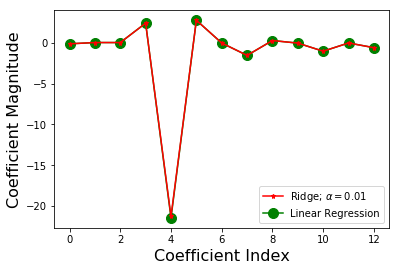

In [117]:
plt.plot(rr.coef_,marker='*',markersize = 5,color='red',
         label = r'Ridge; $\alpha = 0.01$',zorder = 7)
plt.plot(lr.coef_,marker='o',markersize = 10,color='green',
         label = 'Linear Regression')
plt.xlabel('Coefficient Index',fontsize = 16)
plt.ylabel('Coefficient Magnitude',fontsize = 16)
plt.legend(loc = 'best')
plt.show()

In [132]:
rr = Ridge(alpha = 100,solver = 'cholesky')

In [133]:
rr.fit(X_train,y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [134]:
train_score = lr.score(X_train,y_train)
test_score = lr.score(X_test,y_test)
print(train_score)
print(test_score)

0.7103879080674731
0.7836295385076268


In [135]:
ridge_train_score = rr.score(X_train,y_train)
ridge_test_score = rr.score(X_test,y_test)
print(ridge_train_score)
print(ridge_test_score)

0.6817424284288655
0.7478638002897837


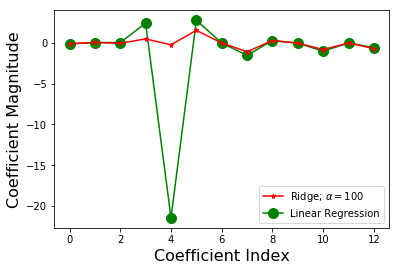

In [136]:
plt.plot(rr.coef_,marker='*',markersize = 5,color='red',
         label = r'Ridge; $\alpha = 100$',zorder = 7)
plt.plot(lr.coef_,marker='o',markersize = 10,color='green',
         label = 'Linear Regression')
plt.xlabel('Coefficient Index',fontsize = 16)
plt.ylabel('Coefficient Magnitude',fontsize = 16)
plt.legend(loc = 'best')
plt.show()

As we have tried with alpha = 100,you can observe as higher the value of alpha,the coefficient indices 3,4,5 are considerably less when compared to linear regression.

# Lasso Regression(Least Absolute Shrinkage and Selection Operator Regression)
Just like Ridge regression it also adds a regularization term.It automatically performs feature selection and outputs a sparse model,it performs feature selection as well.Here some of the coefficients become zero.It is majorly used to prevent overfitting as well as feature selection.

An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the least important features(i.e.,set them to zero).As some of the coefficents becomes exactly zero,which is equivalent to a particular feature being excluded from the model.It is majorly used to prevent overfitting as well as feature selection,default alpha is 1.

In [ ]:







from sklearn.linear_model import Lasso

In [ ]:
#Lets look the following example
m = 150
X = 6*np.random.rand(m,1)
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [ ]:
X[1]

In [ ]:
y[1]

In [ ]:
lasso_reg = Lasso(alpha = 0.1)

In [ ]:
lasso_reg.fit(X,y)

In [ ]:
lasso_reg.predict([[1]])

In [ ]:
newX

In [ ]:
newY

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(newX,newY,test_size=0.3,random_state = 31)

In [ ]:
lasso = Lasso(alpha = 1)

In [ ]:
lasso.fit(X_train,y_train)

In [ ]:
train_score = lasso.score(X_train,y_train)
print(train_score)

In [ ]:
test_score = lasso.score(X_test,y_test)
print(test_score)

In [ ]:
coeff_used = np.sum(lasso.coef_!=0)
print(coeff_used)

In [ ]:
boston.feature_names

In [ ]:
boston.feature_names[lasso.coef_ ==0]

In [ ]:
boston.feature_names[lasso.coef_ !=0]

In [ ]:
plt.plot(lasso.coef_,marker='*',markersize = 5,color='red',label = r'Lasso; $\alpha = 1.0$',zorder = 7)
plt.tight_layout()
plt.show()

# ElasticNet
ElasticNet is a middleground between Ridge and Lasso Regression,it is simple mix of both Ridge and Lasso's regularization terms,and we can control the mix ratio 'r' when r=0.Elastic Net = Ridge Regression and when r = 1 it is equivalent to Lasso Regression.

In general ElasticNet is preferred over Lasso since Lasso may behave erratically when the number of features are greater than the number of training instances.

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
#Lets look the following example
m = 150
X = 6*np.random.rand(m,1)
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [ ]:
X[1]

In [ ]:
y[1]

In [ ]:
elastic_net = ElasticNet(alpha = 0.1,l1_ratio = 0.5)

In [ ]:
elastic_net.fit(X,y)

In [ ]:
elastic_net.predict([[1]])